# Drawing Decision Trees in `sklearn`
_Example based on [sklearn's Decision Trees](http://scikit-learn.org/dev/modules/tree.html#classification)._


To be able to run thise code, you might need to install the following packages first

    conda install pydot
    brew install graphviz

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
model = tree.DecisionTreeClassifier()
model = model.fit(iris.data, iris.target)

Once trained, we can export the tree in Graphviz format using the `export_graphviz` exporter. 

```python
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)
```

Then we can use Graphviz’s dot tool to create a PDF file (or any other supported file type): 

    dot -Tpdf iris.dot -o iris.pdf.
    
Alternatively, if we have Python module `pydot` installed, we can generate a PDF file (or any other supported file type) directly in Python, which is what we will do. IPython notebooks can also render these plots inline using the `Image()` function:

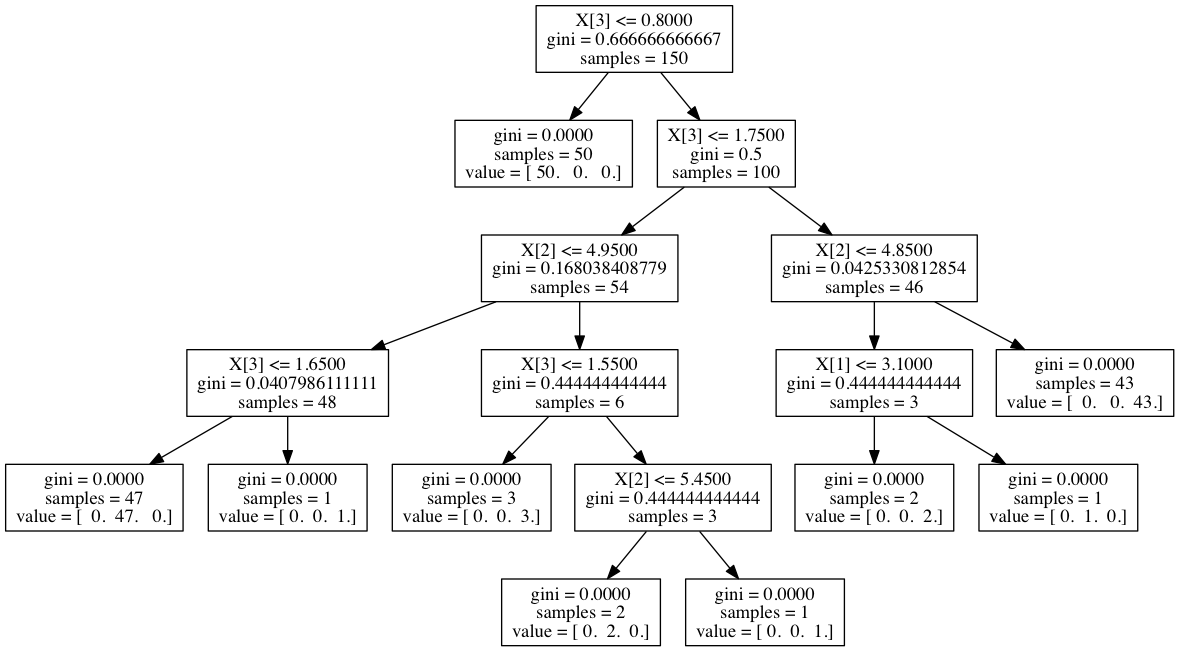

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydot 
dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

We could also save this beautiful tree to disk, if you'd like.

In [4]:
graph.write_pdf("iris.pdf") 

True